# 重回GitHub版本

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# 資料下載與解壓縮
!cp "/content/gdrive/MyDrive/SimpsonRecognition-2.zip" "/content/"
!unzip -q -o "/content/SimpsonRecognition-2.zip" -d "/content/dataset/"

# 設定資料路徑
base_dir = '/content/dataset/'
train_dir = f'{base_dir}/train/train'
test_dir = f'{base_dir}/test-final/test-final'


Mounted at /content/gdrive


In [ ]:
# 步驟 2：複製壓縮檔案到 Colab 工作目錄
zip_files = [
    #'/content/gdrive/MyDrive/train-aug-part0.zip',
    #'/content/gdrive/MyDrive/train-aug-part1.zip',
    #'/content/gdrive/MyDrive/train-aug-part2.zip',
    #'/content/gdrive/MyDrive/train-aug-part3.zip',
    #'/content/gdrive/MyDrive/train-aug-part4.zip',
    '/content/gdrive/MyDrive/train-aug-part5.zip'
]

for zip_file in zip_files:
    !cp "{zip_file}" "/content/"

# 步驟 3：解壓縮壓縮檔案
import os
!mkdir -p "/content/dataset/train-aug"

zip_filenames = [
    'train-aug-part0.zip',
    'train-aug-part1.zip',
    'train-aug-part2.zip',
    'train-aug-part3.zip',
    'train-aug-part4.zip',
    'train-aug-part5.zip'
]

for zip_filename in zip_filenames:
    zip_path = os.path.join('/content', zip_filename)
    !unzip -q -o "{zip_path}" -d "/content/dataset/train-aug"

# 步驟 4：檢查檔案數量是否正確
# 原始和增強後資料夾路徑
original_train_dir = '/content/dataset/train/train'  # 原始路徑
augmented_train_dir = '/content/dataset/train-aug'  # 增強後路徑

# 獲取所有原始資料夾名稱
character_dirs = [d for d in os.listdir(original_train_dir) if os.path.isdir(os.path.join(original_train_dir, d))]

print(f"共有 {len(character_dirs)} 個人物資料夾需要檢查。")

# 檢查每個資料夾圖片數量
for character in character_dirs:
    original_folder = os.path.join(original_train_dir, character)
    augmented_folder = os.path.join(augmented_train_dir, character)

    # 確認增強資料夾存在
    if not os.path.exists(augmented_folder):
        print(f"增強資料夾不存在：{augmented_folder}")
        continue

    # 獲取圖片檔案列表
    original_images = [f for f in os.listdir(original_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    augmented_images = [f for f in os.listdir(augmented_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # 計算圖片數量
    original_count = len(original_images)
    augmented_count = len(augmented_images)
    expected_augmented_count = original_count * 5  # 每張原始圖片生成 5 個增強樣本

    # 檢查數量是否正確
    status = '✓' if augmented_count == expected_augmented_count else '✗'
    print(f"{character}: 原始 = {original_count}, 增強 = {augmented_count}, 預期增強 = {expected_augmented_count} {status}")

# 檢查是否有缺失的資料夾
augmented_character_dirs = [d for d in os.listdir(augmented_train_dir) if os.path.isdir(os.path.join(augmented_train_dir, d))]
missing_characters = set(character_dirs) - set(augmented_character_dirs)

if missing_characters:
    print("\n以下人物資料夾在增強資料中缺失：")
    for character in missing_characters:
        print(f"- {character}")
else:
    print("\n所有人物資料夾均存在於增強資料中。")

共有 50 個人物資料夾需要檢查。
abraham_grampa_simpson: 原始 = 2067, 增強 = 10335, 預期增強 = 10335 ✓
comic_book_guy: 原始 = 2008, 增強 = 10040, 預期增強 = 10040 ✓
miss_hoover: 原始 = 1881, 增強 = 9405, 預期增強 = 9405 ✓
troy_mcclure: 原始 = 1891, 增強 = 9455, 預期增強 = 9455 ✓
moe_szyslak: 原始 = 2035, 增強 = 10175, 預期增強 = 10175 ✓
chief_wiggum: 原始 = 2067, 增強 = 10335, 預期增強 = 10335 ✓
cletus_spuckler: 原始 = 1901, 增強 = 9505, 預期增強 = 9505 ✓
rainier_wolfcastle: 原始 = 1905, 增強 = 9525, 預期增強 = 9525 ✓
apu_nahasapeemapetilon: 原始 = 2044, 增強 = 10220, 預期增強 = 10220 ✓
sideshow_bob: 原始 = 2067, 增強 = 10335, 預期增強 = 10335 ✓
bart_simpson: 原始 = 2026, 增強 = 10130, 預期增強 = 10130 ✓
lenny_leonard: 原始 = 1955, 增強 = 9775, 預期增強 = 9775 ✓
edna_krabappel: 原始 = 1960, 增強 = 9800, 預期增強 = 9800 ✓
kent_brockman: 原始 = 2016, 增強 = 10080, 預期增強 = 10080 ✓
martin_prince: 原始 = 1889, 增強 = 9445, 預期增強 = 9445 ✓
lisa_simpson: 原始 = 2039, 增強 = 10195, 預期增強 = 10195 ✓
kearney_zzyzwicz: 原始 = 1876, 增強 = 9380, 預期增強 = 9380 ✓
duff_man: 原始 = 1880, 增強 = 9400, 預期增強 = 9400 ✓
mayor_quimby: 原始 = 1926, 增強 = 

In [ ]:
# 只用增廣資料訓練
train_dir = f'{base_dir}/train-aug'  # 使用增廣後的資料
test_dir = f'{base_dir}/test-final/test-final'

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 將 image_size 調整為 299x299
image_size = (299, 299)
batch_size = 128

# 設定 ImageDataGenerator 進行增廣處理
train_datagen = ImageDataGenerator(
    rescale=1./255,          # 正規化像素值
    horizontal_flip=True,    # 隨機水平翻轉
    validation_split=0.2     # 20% 用於驗證集
)

# 建立訓練資料集
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,  # 調整圖片尺寸為 299x299
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'        # 分出訓練集
)

# 建立驗證資料集
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,  # 調整圖片尺寸為 299x299
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'      # 分出驗證集
)

# 確認資料生成器是否正確運作
print(f"訓練資料樣本數: {train_generator.samples}")
print(f"驗證資料樣本數: {validation_generator.samples}")


Found 387704 images belonging to 50 classes.
Found 96926 images belonging to 50 classes.
訓練資料樣本數: 387704
驗證資料樣本數: 96926


In [ ]:
# 使用 Xception 模型作為基礎模型
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# 凍結前面的卷積層
for layer in base_model.layers[:100]:
    layer.trainable = False

# 添加自訂的全連接層
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 編譯模型
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 21,398,874 (81.63 MB)

 Trainable params: 10,015,738 (38.21 MB)

 Non-trainable params: 11,383,136 (43.42 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# 設定 EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # 增加耐心次數
    restore_best_weights=True
)

# 設定學習率調整策略
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  # 每次減小學習率的比例
    patience=3,  # 如果 val_loss 連續 3 個 epoch 沒有改善，降低學習率
    min_lr=1e-6,  # 最低學習率
    verbose=1
)

# 設定 ModelCheckpoint
checkpoint_path = "/content/xception_best_model.keras"
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# 更新訓練參數：調整學習率並增加 epoch
initial_learning_rate = 1e-4  # 調低學習率
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 開始訓練模型
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30,  # 增加 epoch 數
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)


Epoch 1/30
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.5914 - loss: 1.6099
Epoch 1: val_loss improved from inf to 0.44466, saving model to /content/xception_best_model.keras
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 1123s 359ms/step - accuracy: 0.5915 - loss: 1.6097 - val_accuracy: 0.8783 - val_loss: 0.4447 - learning_rate: 1.0000e-04
Epoch 2/30
   1/3028 ━━━━━━━━━━━━━━━━━━━━ 7:01 139ms/step - accuracy: 0.9062 - loss: 0.4183
Epoch 2: val_loss did not improve from 0.44466
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9062 - loss: 0.4183 - val_accuracy: 0.8000 - val_loss: 0.5357 - learning_rate: 1.0000e-04
Epoch 3/30
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9071 - loss: 0.3393
Epoch 3: val_loss improved from 0.44466 to 0.32173, saving model to /content/xception_best_model.keras
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 1051s 346ms/step - accuracy: 0.9071 - loss: 0.3393 - val_accuracy: 0.9109 - val_loss: 0.3217 - learning_rate: 1.0000e-04
Epoch 4/30
   1/3028 ━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tqdm import tqdm
from datetime import datetime

# 載入最佳模型
best_model = load_model(checkpoint_path)

# 使用 ImageDataGenerator 並建立測試資料生成器
test_datagen = ImageDataGenerator(rescale=1./255)

# 建立測試資料生成器，設定 shuffle=False 以保證順序不變
test_generator = test_datagen.flow_from_directory(
    directory=os.path.dirname(test_dir),
    target_size=image_size,
    batch_size=1,
    class_mode=None,
    shuffle=False
)

# 獲取所有角色名稱（按照訓練集的 class_indices 排序）
class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

# 進行預測
print("Start predicting...")
predictions = best_model.predict(test_generator, verbose=1)
predicted_classes = [idx_to_class[np.argmax(pred)] for pred in predictions]

# 根據測試集檔名生成輸出格式
output = []
for i, fname in enumerate(tqdm(test_generator.filenames)):
    image_id = int(os.path.basename(fname).split('.')[0])  # 提取圖片 ID，轉換為整數以便排序
    character = predicted_classes[i]
    output.append([image_id, character])

# 排序輸出結果
output.sort(key=lambda x: x[0])

# 生成順序排列的 ID
output_df = pd.DataFrame(output, columns=['id', 'character'])
output_df['id'] = range(1, len(output_df) + 1)

# 取得當前時間並格式化為 YYYYMMDD_HHMM
current_time = datetime.now().strftime('%Y%m%d_%H%M')
output_filename = f'predictions_{current_time}.csv'
output_path = f'/content/{output_filename}'

# 匯出為 CSV 檔案
output_df.to_csv(output_path, index=False)
print(f"Predictions saved to {output_path}")

# 顯示部分預測結果
print("Sample predictions:")
for i, fname in enumerate(test_generator.filenames[:5]):  # 使用 test_generator.filenames 而不是 test_df
    print(f'Image: {os.path.basename(fname)}, Predicted Class: {predicted_classes[i]}')


Found 10791 images belonging to 1 classes.
Start predicting...
10791/10791 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step


100%|██████████| 10791/10791 [00:00<00:00, 612624.99it/s]

Predictions saved to /content/predictions_20241123_2036.csv
Sample predictions:
Image: 1.jpg, Predicted Class: disco_stu
Image: 10.jpg, Predicted Class: professor_john_frink
Image: 100.jpg, Predicted Class: charles_montgomery_burns
Image: 1000.jpg, Predicted Class: principal_skinner
Image: 10000.jpg, Predicted Class: agnes_skinner


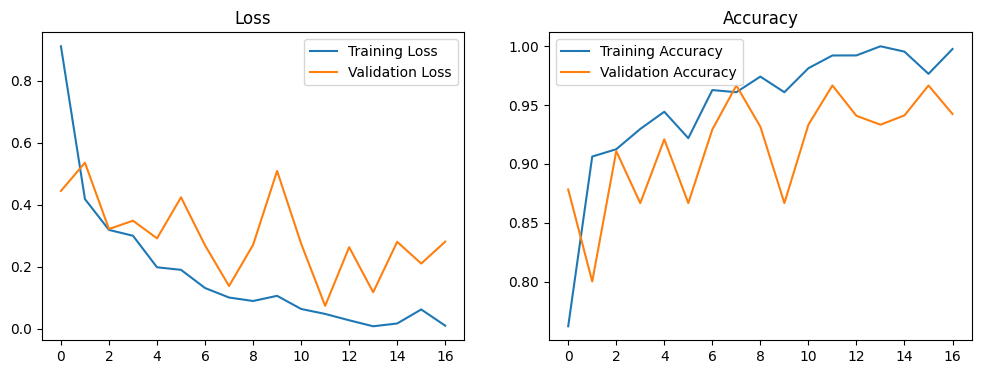

In [ ]:
# 繪製訓練和驗證的 Loss 與 Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


Found 484630 images belonging to 50 classes.
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step


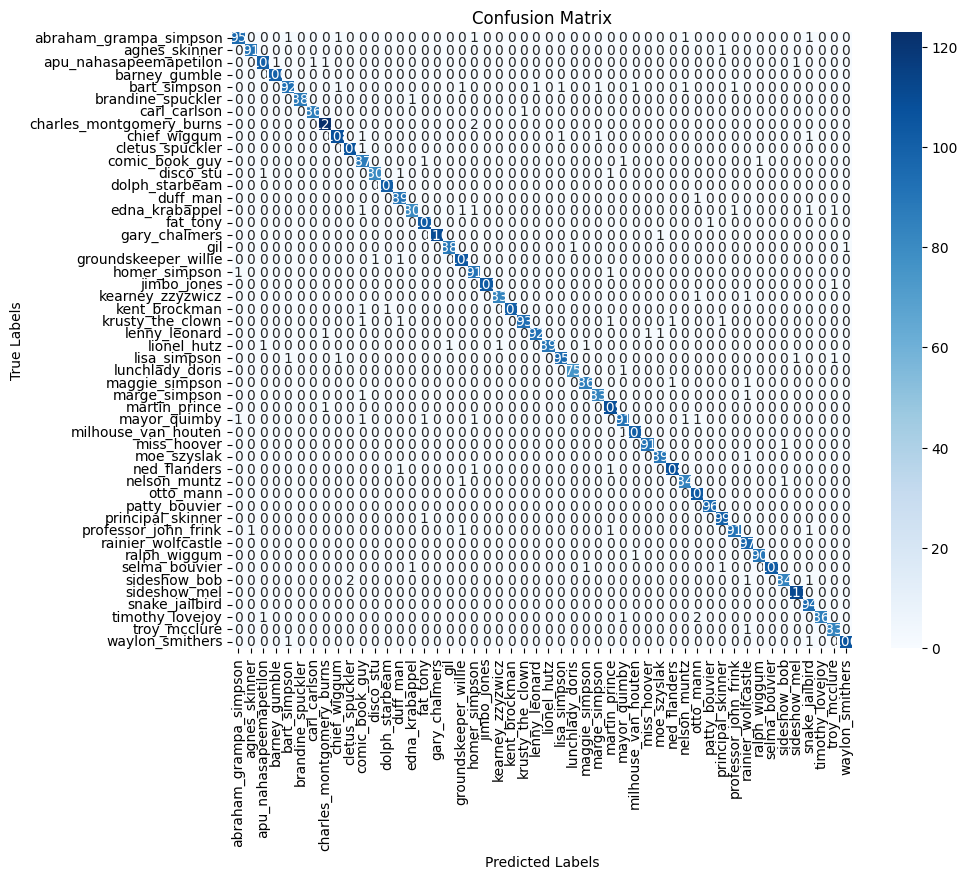

Classification Report:
                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.98      0.95      0.96       100
           agnes_skinner       0.99      0.99      0.99        92
  apu_nahasapeemapetilon       0.97      0.96      0.97       104
           barney_gumble       0.99      1.00      1.00       100
            bart_simpson       0.97      0.92      0.94       100
       brandine_spuckler       1.00      0.99      0.99        89
            carl_carlson       0.99      0.99      0.99        87
charles_montgomery_burns       0.98      0.98      0.98       125
            chief_wiggum       0.97      0.96      0.97       112
         cletus_spuckler       0.98      0.99      0.99       107
          comic_book_guy       0.93      0.97      0.95        90
               disco_stu       0.99      0.96      0.98        83
          dolph_starbeam       0.99      1.00      1.00       101
                duff_man       0.96      0.99      0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 定義相關參數
image_size = (128, 128)  # 與模型一致的影像大小
batch_size = 32
model_path = "/content/xception_best_model.keras"  # 模型路徑
test_dir = "/content/dataset/train-aug"  # 測試資料路徑

# 1. 載入模型
model = load_model(model_path)

# 更新影像大小為 (299, 299)
image_size = (299, 299)

# 建立測試資料生成器
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,  # 修改 target_size 為 (299, 299)
    batch_size=1,  # 設定 batch_size 為 1 以便逐一讀取
    class_mode="categorical",
    shuffle=False  # 保持順序以便後續取樣
)

# 隨機選取 1% 的測試資料
num_test_samples = len(test_generator.filenames)
sample_size = int(0.01 * num_test_samples)  # 1% 的樣本數
random_indices = np.random.choice(num_test_samples, sample_size, replace=False)

# 取出隨機樣本並進行預測
sample_images = []
sample_labels = []
for idx in random_indices:
    image, label = test_generator[idx]
    sample_images.append(image[0])  # 單張影像
    sample_labels.append(label[0])  # 對應標籤

sample_images = np.array(sample_images)
sample_labels = np.array(sample_labels)

# 使用模型進行預測
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(sample_labels, axis=1)
class_labels = list(test_generator.class_indices.keys())


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 計算混淆矩陣
cm = confusion_matrix(true_classes, predicted_classes)

# 繪製混淆矩陣
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 顯示分類報告
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 提取模型第一层权重
first_layer = model.layers[1]  # 通常第一个卷积层是模型的第2层，索引为1
weights, biases = first_layer.get_weights()

# 打印权重和偏置的形状
print(f"Shape of weights: {weights.shape}")  # 通常为 (filter_height, filter_width, input_channels, num_filters)
print(f"Shape of biases: {biases.shape}")   # 通常为 (num_filters,)

# 标准化权重到 [0, 1]
weights_min, weights_max = np.min(weights), np.max(weights)
normalized_weights = (weights - weights_min) / (weights_max - weights_min)

# 可视化权重
num_filters = weights.shape[-1]  # 滤波器的数量
num_channels = weights.shape[-2]  # 输入通道的数量
filter_size = weights.shape[0]  # 滤波器的大小 (height, width)

# 设置绘图网格
plt.figure(figsize=(12, 12))
for i in range(num_filters):
    # 提取第 i 个滤波器的所有通道
    filter_weights = normalized_weights[..., i]

    # 如果有多个输入通道，将它们合并为 RGB 图像
    if num_channels == 3:
        # 转换为 RGB 图像
        filter_image = filter_weights
    else:
        # 单通道滤波器，直接显示灰度图
        filter_image = filter_weights[..., 0]

    plt.subplot(int(np.sqrt(num_filters)) + 1, int(np.sqrt(num_filters)) + 1, i + 1)
    plt.imshow(filter_image, cmap='viridis' if num_channels == 1 else None)
    plt.axis('off')
    plt.title(f'Filter {i + 1}')

plt.tight_layout()
plt.show()


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
# 打印模型的层次结构
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name}, Type: {type(layer)}")

Layer 0: input_layer_3, Type: <class 'keras.src.layers.core.input_layer.InputLayer'>
Layer 1: block1_conv1, Type: <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
Layer 2: block1_conv1_bn, Type: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
Layer 3: block1_conv1_act, Type: <class 'keras.src.layers.activations.activation.Activation'>
Layer 4: block1_conv2, Type: <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
Layer 5: block1_conv2_bn, Type: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
Layer 6: block1_conv2_act, Type: <class 'keras.src.layers.activations.activation.Activation'>
Layer 7: block2_sepconv1, Type: <class 'keras.src.layers.convolutional.separable_conv2d.SeparableConv2D'>
Layer 8: block2_sepconv1_bn, Type: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
Layer 9: block2_sepconv2_act, Type: <class 'keras.src.layers.activations.activation.Activation'>
Layer 10: block2_

In [ ]:
# 替换索引为实际的卷积层索引，例如第 2 层为卷积层
conv_layer_index = 2  # 根据模型结构调整此值
first_conv_layer = model.layers[conv_layer_index]

# 提取卷积层权重
weights = first_conv_layer.get_weights()[0]  # 卷积核权重
print(f"Shape of weights: {weights.shape}")  # (filter_height, filter_width, input_channels, num_filters)

# 如果卷积层包含偏置（例如有 bias=True 的 Conv2D 层），可以这样提取：
if len(first_conv_layer.get_weights()) > 1:
    biases = first_conv_layer.get_weights()[1]  # 偏置
    print(f"Shape of biases: {biases.shape}")


Shape of weights: (32,)
Shape of biases: (32,)


Shape of weights: (3, 3, 3, 32)


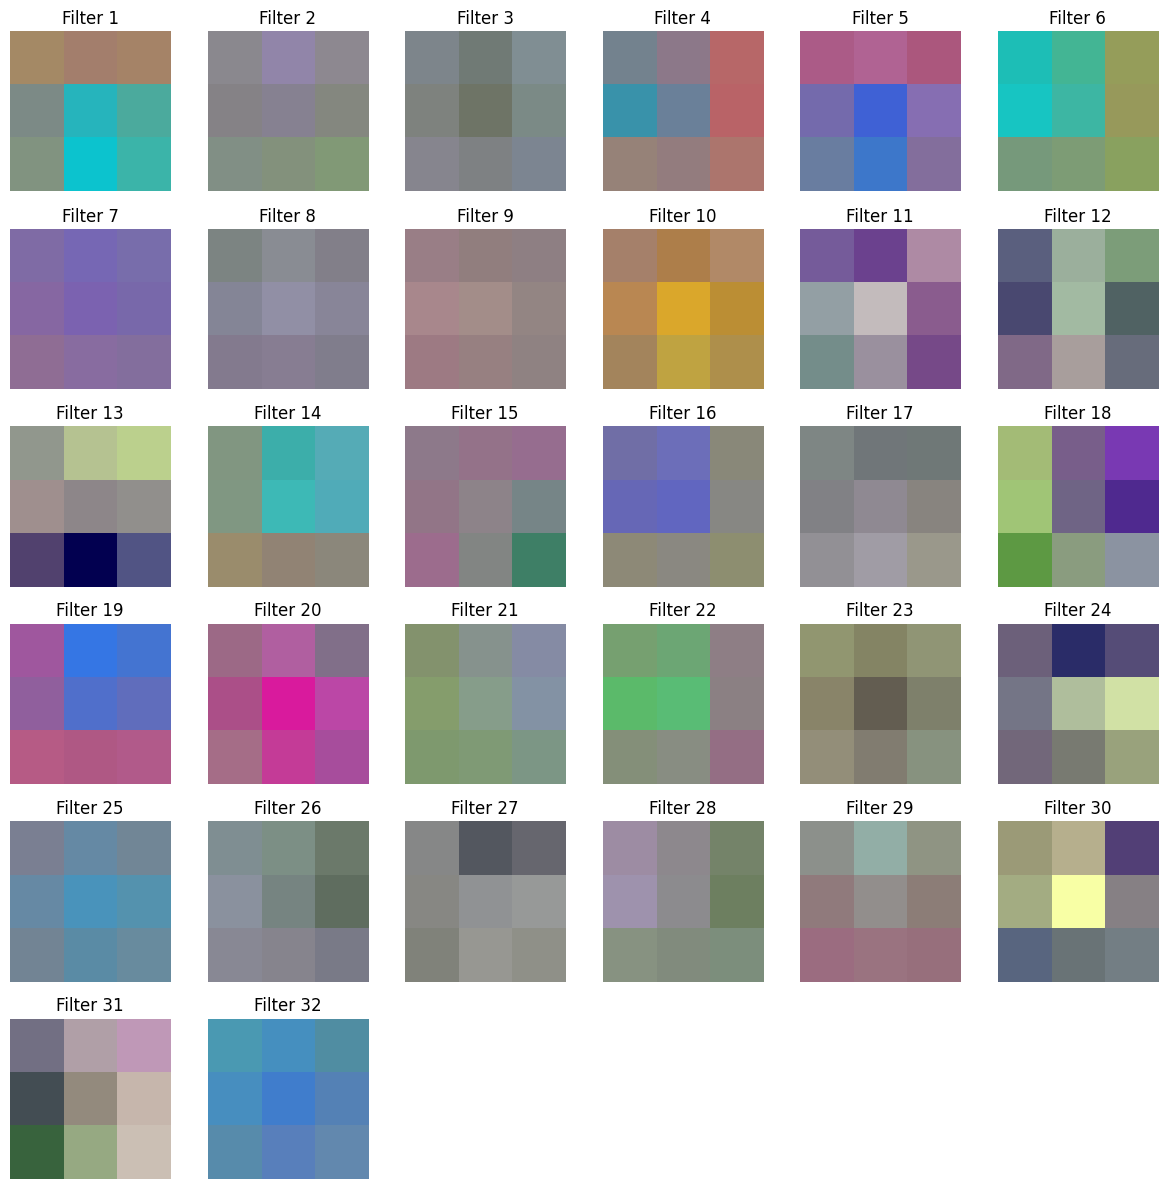

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 提取第一個卷積層
conv_layer_index = 1  # block1_conv1
first_conv_layer = model.layers[conv_layer_index]

# 提取權重和偏置
weights = first_conv_layer.get_weights()[0]  # 卷積層權重
print(f"Shape of weights: {weights.shape}")  # (filter_height, filter_width, input_channels, num_filters)

# 如果包含偏置（可選）
if len(first_conv_layer.get_weights()) > 1:
    biases = first_conv_layer.get_weights()[1]
    print(f"Shape of biases: {biases.shape}")  # (num_filters,)


# 標準化權重到 [0, 1]
weights_min, weights_max = np.min(weights), np.max(weights)
normalized_weights = (weights - weights_min) / (weights_max - weights_min)

# 可視化每個濾波器的權重
num_filters = weights.shape[-1]  # 濾波器數量
filter_size = weights.shape[0]  # 濾波器大小
input_channels = weights.shape[-2]  # 輸入通道數（如 RGB 為 3）

# 設置圖形大小
plt.figure(figsize=(12, 12))

for i in range(num_filters):
    # 提取第 i 個濾波器的所有通道
    filter_weights = normalized_weights[:, :, :, i]

    # 如果輸入通道為 3（RGB），顯示為彩色圖像
    if input_channels == 3:
        filter_image = filter_weights  # 直接使用 RGB 權重
    else:
        # 單通道情況，顯示灰度圖
        filter_image = filter_weights[:, :, 0]

    # 在網格中繪製每個濾波器
    plt.subplot(int(np.sqrt(num_filters)) + 1, int(np.sqrt(num_filters)) + 1, i + 1)
    plt.imshow(filter_image, cmap='viridis' if input_channels == 1 else None)
    plt.axis('off')
    plt.title(f'Filter {i + 1}')

plt.tight_layout()
plt.show()


In [ ]:
plt.hist(weights.flatten(), bins=50)
plt.title("Distribution of Weights in the First Layer")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.show()


NameError: name 'weights' is not defined

# 雜訊訓練

In [ ]:
import tensorflow as tf

def add_gaussian_noise(image, mean=0.0, stddev=0.05):
    """
    加入高斯噪聲
    :param image: 輸入影像 (Tensor)
    :param mean: 噪聲均值
    :param stddev: 噪聲標準差
    :return: 加入噪聲後的影像
    """
    noise = tf.random.normal(shape=tf.shape(image), mean=mean, stddev=stddev)
    return tf.clip_by_value(image + noise, 0.0, 1.0)
def add_speckle_noise(image, noise_level=0.1):
    """
    加入斑點噪聲 (Speckle Noise)
    :param image: 輸入影像 (Tensor)
    :param noise_level: 噪聲強度
    :return: 加入噪聲後的影像
    """
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=noise_level)
    return tf.clip_by_value(image + image * noise, 0.0, 1.0)
def add_poisson_noise(image, lam=0.1):
    """
    加入泊松噪聲 (Poisson Noise)
    :param image: 輸入影像 (Tensor)
    :param lam: 泊松分布參數
    :return: 加入噪聲後的影像
    """
    noise = tf.random.poisson(shape=tf.shape(image), lam=lam)
    return tf.clip_by_value(image + noise / 255.0, 0.0, 1.0)
def add_salt_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05):
    """
    加入鹽與胡椒噪聲 (Salt and Pepper Noise)
    :param image: 輸入影像 (Tensor)
    :param salt_prob: 加入鹽噪聲的機率
    :param pepper_prob: 加入胡椒噪聲的機率
    :return: 加入噪聲後的影像
    """
    random_tensor = tf.random.uniform(shape=tf.shape(image))
    salt_mask = tf.cast(random_tensor < salt_prob, tf.float32)
    pepper_mask = tf.cast(random_tensor > (1 - pepper_prob), tf.float32)
    image = tf.clip_by_value(image * (1 - salt_mask) + salt_mask, 0.0, 1.0)
    image = tf.clip_by_value(image * (1 - pepper_mask), 0.0, 1.0)
    return image
def random_color_jitter(image, brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1):
    """
    隨機調整亮度、對比度、飽和度和色調
    :param image: 輸入影像 (Tensor)
    :return: 調整後的影像
    """
    image = tf.image.random_brightness(image, max_delta=brightness)
    image = tf.image.random_contrast(image, lower=1-contrast, upper=1+contrast)
    image = tf.image.random_saturation(image, lower=1-saturation, upper=1+saturation)
    image = tf.image.random_hue(image, max_delta=hue)
    return tf.clip_by_value(image, 0.0, 1.0)
def random_flip_rotate(image):
    """
    隨機水平翻轉、垂直翻轉與旋轉
    :param image: 輸入影像 (Tensor)
    :return: 增強後的影像
    """
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    return image
def random_posterize(image, bits=2):
    """
    隨機進行 Posterize 處理 (減少顏色位元)
    :param image: 輸入影像 (Tensor)
    :param bits: 保留的顏色位元數
    :return: Posterize 處理後的影像
    """
    shift = 8 - bits
    image = tf.math.floor(image * (2**bits)) / (2**bits)
    return image
def random_solarize(image, threshold=0.5):
    """
    隨機進行 Solarize 處理
    :param image: 輸入影像 (Tensor)
    :param threshold: 日光化閾值
    :return: Solarize 處理後的影像
    """
    return tf.where(image < threshold, image, 1.0 - image)
def custom_augmentation(image):
    image = add_gaussian_noise(image)
    image = add_speckle_noise(image)
    image = add_poisson_noise(image)
    image = add_salt_pepper_noise(image)
    image = random_color_jitter(image)
    image = random_flip_rotate(image)
    image = random_posterize(image)
    image = random_solarize(image)
    return image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 設定影像大小和批次大小
image_size = (128, 128)
batch_size = 128

# 建立乾淨集的資料增強器
clean_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 分割 20% 為驗證集
)

# 建立乾淨集的訓練和驗證生成器
clean_train_generator = clean_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

clean_validation_generator = clean_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# 建立雜訊集的資料增強器，使用自訂增強函數
noisy_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 分割 20% 為驗證集
    preprocessing_function=custom_augmentation
)

# 建立雜訊集的訓練和驗證生成器
noisy_train_generator = noisy_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

noisy_validation_generator = noisy_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 77560 images belonging to 50 classes.
Found 19369 images belonging to 50 classes.
Found 77560 images belonging to 50 classes.
Found 19369 images belonging to 50 classes.


In [ ]:
# 解除 Xception 模型的凍結層
for layer in base_model.layers[:100]:
    layer.trainable = False
for layer in base_model.layers[100:]:
    layer.trainable = True

# 編譯模型
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 設定 EarlyStopping 和 ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint_path = "/content/xception_best_model.keras"
model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)

# 進行雜訊集微調訓練
history = model.fit(
    noisy_train_generator,
    steps_per_epoch=noisy_train_generator.samples // batch_size,
    validation_data=noisy_validation_generator,
    validation_steps=noisy_validation_generator.samples // batch_size,
    epochs=5,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)


Epoch 1/5
605/605 [==============================] - ETA: 0s - loss: 3.7981 - accuracy: 0.0382
Epoch 1: val_loss improved from inf to 3.83952, saving model to /content/xception_best_model.keras
605/605 [==============================] - 1394s 2s/step - loss: 3.7981 - accuracy: 0.0382 - val_loss: 3.8395 - val_accuracy: 0.0350
Epoch 2/5
605/605 [==============================] - ETA: 0s - loss: 3.7908 - accuracy: 0.0382
Epoch 2: val_loss improved from 3.83952 to 3.83737, saving model to /content/xception_best_model.keras
605/605 [==============================] - 1378s 2s/step - loss: 3.7908 - accuracy: 0.0382 - val_loss: 3.8374 - val_accuracy: 0.0351
Epoch 3/5
304/605 [==============>...............] - ETA: 9:07 - loss: 3.7898 - accuracy: 0.0390

KeyboardInterrupt: 

In [ ]:
# 儲存最終模型和權重
final_model_path = "/content//xception_final_model.h5"
final_weights_path = "/content/xception_final_weights.h5"

# 儲存完整模型（包含架構和權重）
model.save(final_model_path)
print(f"Model saved to {final_model_path}")

# 儲存權重
model.save_weights(final_weights_path)
print(f"Weights saved to {final_weights_path}")


In [ ]:
# 評估模型在乾淨驗證集和雜訊驗證集上的表現
clean_loss, clean_accuracy = model.evaluate(clean_validation_generator)
noisy_loss, noisy_accuracy = model.evaluate(noisy_validation_generator)

print(f'Clean Validation Loss: {clean_loss:.4f}, Clean Validation Accuracy: {clean_accuracy:.4f}')
print(f'Noisy Validation Loss: {noisy_loss:.4f}, Noisy Validation Accuracy: {noisy_accuracy:.4f}')
